### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
# -- ВАШ КОД ТУТ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

data = pd.read_csv('3.10_non_linear.csv', sep=',')

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T


c:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.335e+00, tolerance: 3.191e-03
  model = cd_fast.enet_coordinate_descent(


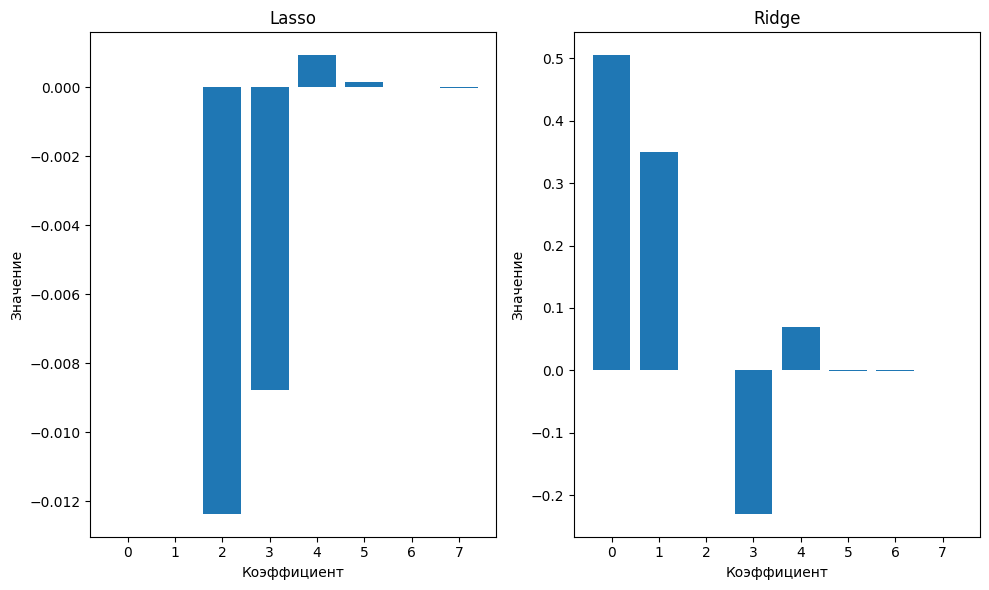

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

degree = 8

# Разделение на признаки и целевую переменную
X = generate_degrees(data['x_train'], degree)
y = data['y_train'].values

# Обучение моделей Lasso и Ridge
alpha = 0.8
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X, y)

ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)

# Получение коэффициентов моделей
lasso_coefs = lasso_model.coef_
ridge_coefs = ridge_model.coef_

# Построение столбчатых графиков
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1) # rows, cols, номер в колонке
plt.bar(range(len(lasso_coefs)), lasso_coefs)
plt.title('Lasso')
plt.xlabel('Коэффициент')
plt.ylabel('Значение')

plt.subplot(1, 2, 2)
plt.bar(range(len(ridge_coefs)), ridge_coefs)
plt.title('Ridge')
plt.xlabel('Коэффициент')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()



Если фичей очень много (сотни), среди которых есть потенциально не важные - выбирай L1

Если фичей мало и все они важны - выбирай L2